# Smile vs No Smile Images Classification

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
data_dir = 'Images' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
df_attr = pd.read_csv('list_attr_celeba.csv')
df_attr.set_index('image_id', inplace=True)
df_attr.replace(to_replace=-1, value=0, inplace=True) #replace -1 by 0
df_attr.shape

(202599, 40)

In [5]:
df_partition = pd.read_csv('list_eval_partition.csv')
df_partition.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [6]:
for i in df_attr.columns:
    print(i)

5_o_Clock_Shadow
Arched_Eyebrows
Attractive
Bags_Under_Eyes
Bald
Bangs
Big_Lips
Big_Nose
Black_Hair
Blond_Hair
Blurry
Brown_Hair
Bushy_Eyebrows
Chubby
Double_Chin
Eyeglasses
Goatee
Gray_Hair
Heavy_Makeup
High_Cheekbones
Male
Mouth_Slightly_Open
Mustache
Narrow_Eyes
No_Beard
Oval_Face
Pale_Skin
Pointy_Nose
Receding_Hairline
Rosy_Cheeks
Sideburns
Smiling
Straight_Hair
Wavy_Hair
Wearing_Earrings
Wearing_Hat
Wearing_Lipstick
Wearing_Necklace
Wearing_Necktie
Young


In [7]:
df_attr

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
202596.jpg,0,0,0,0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
202597.jpg,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [8]:
#df_partition.set_index('image_id', inplace=True)
df_par_attr = df_partition.join(df_attr['Smiling'], how='inner')
df_par_attr.head()

,image_id,partition,Smiling


In [9]:
smile = df_attr.loc[df_attr['Smiling']==1]
smile_id = list(smile.index)

In [13]:
origin = 'C:/Users/locda/Documents/GitHub/img_align_celeba'
destination1 = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/Images/Smile'
destination2 = 'C:/Users/locda/Documents/GitHub/Happy-Sad-Image-Classification/Images/NoSmile'

files = os.listdir('C:/Users/locda/Documents/GitHub/img_align_celeba')
for file in files:
    filepath = os.path.join(origin, file)
    if file in smile_id:
        shutil.copy(filepath, destination1)
    else:
        shutil.copy(filepath, destination2)


KeyboardInterrupt: 

In [41]:
files1 = os.listdir('Images/NoSmile/')
for i, file in enumerate(files1):
    filepath1 = os.path.join('Images/NoSmile/', file)
    if i >999:
        os.remove(filepath1)
files2 = os.listdir('Images/Smile/')
for i, file in enumerate(files2):
    filepath2 = os.path.join('Images/Smile/', file)
    if i > 999:
        os.remove(filepath2)


In [42]:
unscaled_data = tf.keras.utils.image_dataset_from_directory('Images')

Found 2000 files belonging to 2 classes.


In [43]:
unscaled_data_iterator = unscaled_data.as_numpy_iterator()
batch = unscaled_data_iterator.next()


In [44]:
batch[1]

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

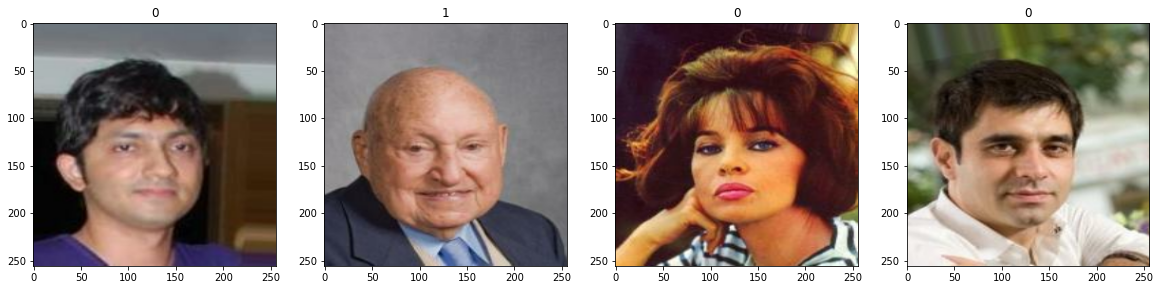

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = unscaled_data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.8666667 , 0.972549  , 0.9372549 ],
          [0.86879593, 0.97467834, 0.93938416],
          [0.8696538 , 0.97553617, 0.94024205],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.8666667 , 0.972549  , 0.9372549 ],
          [0.86714077, 0.9730231 , 0.937729  ],
          [0.86733174, 0.97321415, 0.93792003],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[0.8617341 , 0.96761644, 0.9323223 ],
          [0.86307317, 0.9689555 , 0.9336614 ],
          [0.86420035, 0.9700827 , 0.9347886 ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.04560355, 0.06913297, 0.06128983],
          [0.04639

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [27]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs = 5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
59/59 [==============================] - 24s 409ms/step - loss: 0.5914 - accuracy: 0.6891 - val_loss: 0.4833 - val_accuracy: 0.7794
Epoch 2/5
59/59 [==============================] - 24s 404ms/step - loss: 0.4104 - accuracy: 0.8273 - val_loss: 0.3208 - val_accuracy: 0.8713
Epoch 3/5
59/59 [==============================] - 24s 400ms/step - loss: 0.2729 - accuracy: 0.8824 - val_loss: 0.3083 - val_accuracy: 0.8603
Epoch 4/5
59/59 [==============================] - 24s 409ms/step - loss: 0.2058 - accuracy: 0.9174 - val_loss: 0.2710 - val_accuracy: 0.9044
Epoch 5/5
59/59 [==============================] - 24s 407ms/step - loss: 0.1468 - accuracy: 0.9470 - val_loss: 0.3130 - val_accuracy: 0.8824


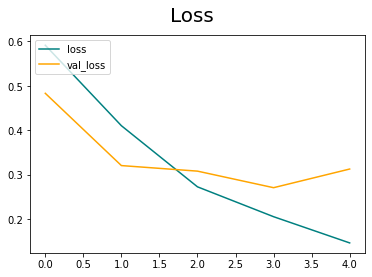

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

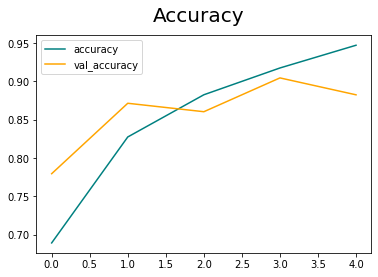

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 91ms/step
tf.Tensor(0.85365856, shape=(), dtype=float32) tf.Tensor(0.85365856, shape=(), dtype=float32) tf.Tensor(0.90625, shape=(), dtype=float32)


TypeError: Image data of dtype object cannot be converted to float

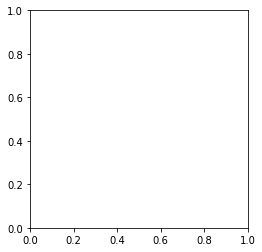

In [36]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()